In [1]:
# sat -> admission
# logistic regression
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

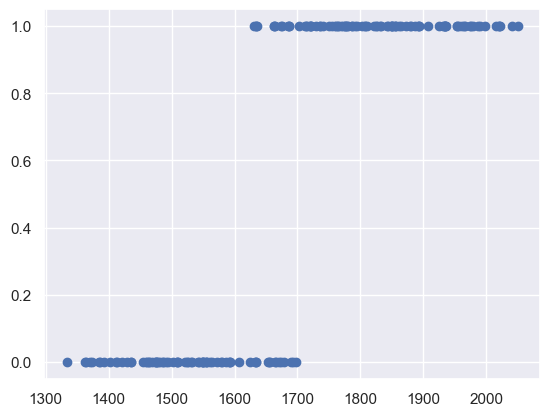

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_54629/4097867937.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))


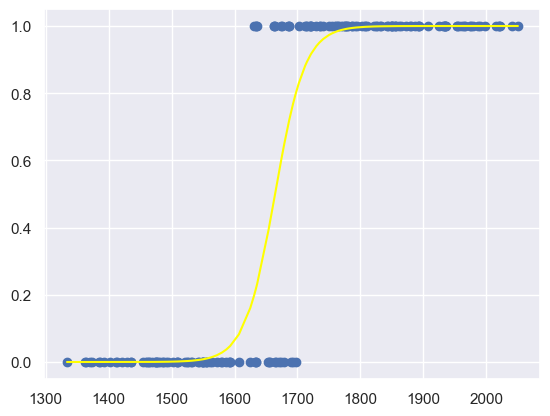

In [2]:
raw_data = pd.read_csv('admittance.csv')
raw_data.head()
raw_data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
raw_data.head()
y = raw_data['Admitted']
x1 = raw_data['SAT']
plt.scatter(x1, y)
plt.show()
# linear regression would be an awful fit

# logistic regression curve
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit() # max num of iterations 35
def f(x, b0, b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))
f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1, y)
plt.plot(x_sorted, f_sorted, color='Yellow')
plt.show()

In [3]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Sep 2025   Pseudo R-squ.:                  0.7992
Time:                        16:30:35   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [4]:
# MLE max likelihood func
# likelihood estimates how likely model at hand describes underlying rel of vars
# log likelihood (mostly almost negative)
# ll null - log likelihood - no independent vars -> y = b0 * 1 (array of ones)
# u want to compare ll of ur model w ll-null to see ur model has any explanatory power

# llr log likelihood ratio, usually near to 0
# measures if model statistically diff. from ll-null -> useless model
# pseudo r squared -> 0.2 - 0.4

# coef -> log of the odds
# when SAT increases by 1 , odds of admittance increases by 4.2%
# for a unit change in var, the change in odds equals exponential of coef

# same way w dummies, we use binary predictors in logistic regression